In [1]:
import os

import matplotlib.pyplot as plt

# import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE

In [2]:
def load_files(path):
    loss = np.loadtxt(path + "training_loss.txt")
    acc = np.loadtxt(path + "training_accuracy.txt")

    domain = np.loadtxt(path + "domain_labels.txt")

    te_loss = np.loadtxt(path + "testing_loss.txt")
    te_acc = np.loadtxt(path + "testing_accuracy.txt")

    machine = np.loadtxt(path + "machine_labels.txt", dtype=str)

    Z = np.load(path + "Z_space.npy")

    args = np.loadtxt(
        path + "arguments.txt", dtype=str, usecols=0
    )  # , delimiter = '\n')
    img_locs = np.loadtxt(path + "image_locs.txt", str)

    true_label = []
    for i in img_locs:
        true_label.append(int(i.split("/")[-2][-4]))

    return loss, acc, te_loss, te_acc, domain, machine, true_label, Z, args, img_locs

In [3]:
ex = "../../model4_fold1/"  # enter the name of the folder where results has been saved
ex = "2022-12-06 14:27:51.855068/"
number_predicted_domains = 3  # enter d_dim

In [4]:
loss, acc, te_loss, te_acc, domain, machine, true_label, Z, args, img_locs = load_files(ex)

In [5]:
# arguments = [str(args.aname), str(args.model), str(args.prior), str(args.zd_dim), str(args.te_d), str(args.tr_d), str(args.L), str
print(
    "Name of the exeriment: ",
    args[0],
    "\n",
    "Model: ",
    args[1],
    "\n",
    "Prior dist:",
    args[2],
    "\n",
    "Z dim: ",
    args[3],
    "\n",
    "Learning rate: ",
    args[7],
)

Name of the exeriment:  vade 
 Model:  cnn 
 Prior dist: Gaus 
 Z dim:  250 
 Learning rate:  5e-05


In [6]:
def machines_per_domain(domain, num_domains, machine, fs, experiment_name):
    """
    Following finction plots distribution of machine labels in each of the predicted clusters/domains.

    domain - predicted labels, loaded from the load function (should be integers)
    num_domain - numer of predicted doamins/clusters (one integest, same ad zd_dim)
    machine - true machine labels (strings format of the machine labels)
    fs - font size
    experiment name - title for the figure
    """
    plt.figure(figsize=(5, 5))
    FD_total = []
    H_total = []
    ND_total = []
    for i in range(1, num_domains + 1):  # ittereate through all of the domains

        ND = 0
        H1 = 0
        H2 = 0
        FD = 0

        for j in range(len(machine)):  # count machines per domain
            if domain[j] == i and machine[j] == "ND":
                ND += 1
            if domain[j] == i and machine[j] == "H1":
                H1 += 1
            if domain[j] == i and machine[j] == "H2":
                H2 += 1
            if domain[j] == i and machine[j] == "FD":
                FD += 1
        # convert numbers to proportions
        all_scanners = ND + H1 + H2 + FD
        FD_total.append(FD / all_scanners)
        H_total.append((H1 + H2) / all_scanners)
        ND_total.append(ND / all_scanners)

    x = np.linspace(2, num_domains * 2, num=num_domains)
    x_ticks = [str(i / 2)[0] for i in x]
    plt.bar(x, FD_total, color="powderblue")
    plt.bar(x, H_total, bottom=FD_total, color="cadetblue")
    plt.bar(x, ND_total, bottom=np.add(FD_total, H_total), color="teal")

    # plt.legend(['FD scanner','H scanner', 'ND scanner'], fontsize=fs-10)
    counter = 0
    for i in x:
        plt.text(
            i - 0.25, FD_total[counter] / 2, str(FD_total[counter])[:4], fontsize=fs
        )
        plt.text(
            i - 0.25,
            FD_total[counter] + (H_total[counter]) / 2,
            str(H_total[counter])[:4],
            fontsize=fs,
        )
        plt.text(
            i - 0.25,
            FD_total[counter] + H_total[counter] + ND_total[counter] / 5,
            str(ND_total[counter])[:4],
            fontsize=fs,
        )
        counter += 1

    plt.yticks(fontsize=fs - 5)
    plt.ylabel("Proportion", fontsize=fs)
    plt.xticks(x, x_ticks, fontsize=fs)
    plt.xlabel("Cluster", fontsize=fs)
    plt.ylim(0, 1.025)

    plt.show()

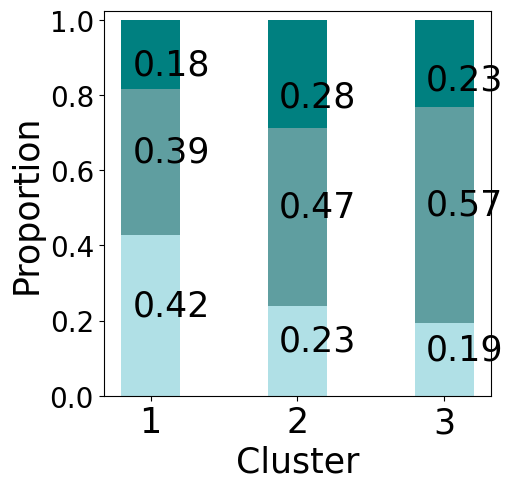

In [7]:
machines_per_domain(domain, number_predicted_domains, machine, 25, "")

In [8]:
def class_per_domain(class_label, num_domains, domain, fs, experiment_name):
    """
    Following finction plots distribution of machine labels in each of the predicted clusters/domains.

    class_label - true class labels
    num_domain - numer of predicted doamins/clusters (one integest, same ad zd_dim)
    domain - predicted labels, loaded from the load function (should be integers)
    fs - font size
    experiment name - title for the figure

    """
    plt.figure(figsize=(5, 5))

    counter = 0
    class_d = []
    C1 = []
    C2 = []
    C3 = []
    all_per_domain = []

    for i in range(1, num_domains + 1):  # itterate through domain numbers

        class1 = 0
        class2 = 0
        class3 = 0

        for j in range(len(class_label)):  # itterate throou all samples
            # print(i, j, class_label[j], domain[j])
            if class_label[j] == 1.0 and domain[j] == i:
                class1 += 1
            if class_label[j] == 2.0 and domain[j] == i:
                class2 += 1
            if class_label[j] == 3.0 and domain[j] == i:
                class3 += 1

        all_classes = class1 + class2 + class3
        C1.append(class1 / all_classes)
        C2.append(class2 / all_classes)
        C3.append(class3 / all_classes)
        all_per_domain.append(class1 + class2 + class3)

    x = np.linspace(2, num_domains * 2, num=num_domains)
    x_ticks = [str(i / 2)[0] for i in x]
    plt.bar(x, C1, color="pink")
    plt.bar(x, C2, bottom=C1, color="palevioletred")
    plt.bar(x, C3, bottom=np.add(C1, C2), color="#8B2252")
    for i in x:
        plt.text(i - 0.25, 3 * C1[counter] / 4, str(C1[counter])[:4], fontsize=fs)
        plt.text(
            i - 0.25, C1[counter] + C2[counter] / 2, str(C2[counter])[:4], fontsize=fs
        )
        plt.text(i - 0.25, 1 - 3 * C3[counter] / 4, str(C3[counter])[:4], fontsize=fs)
        counter += 1
    plt.legend(["HER2 Class 1", "HER2 Class 2", "HER2 Class 3"], fontsize=fs - 10)
    plt.yticks(fontsize=fs - 5)
    plt.ylabel("Proportion", fontsize=fs)
    plt.xticks(x, x_ticks, fontsize=fs)
    plt.xlabel("Cluster", fontsize=fs)
    plt.ylim(0, 1.025)
    plt.show()

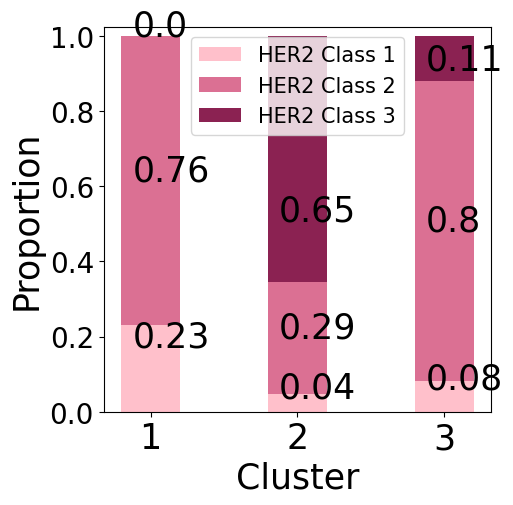

In [9]:
class_per_domain(true_label, 3, domain, 25, "")

In [10]:
# Seperate predicted domains by numbers. All predicted 1s are in d1, etc....
d1 = []
d2 = []
d3 = []
d4 = []
for i in range(len(domain)):

    if domain[i] == 1:
        d1.append(img_locs[i])
    if domain[i] == 2:
        d2.append(img_locs[i])
    if domain[i] == 3:
        d3.append(img_locs[i])
    if domain[i] == 4:
        d4.append(img_locs[i])

In [11]:
import cv2
import torchvision

In [12]:
# import matplotlib.image as mpimg
# img = mpimg.imread
def vizualize_images_per_domain(d, num, N, base_path="../"):
    plt.figure(figsize=(30, 15))
    for j in range(1, N):
        d_path = d[j] if d[j].startswith("/") else base_path + d[j]
        img = torchvision.io.read_image(d_path)
        plt.subplot(1, N, j)
        plt.imshow(img.permute(1, 2, 0))
        name = d[j].split("/")
        title = name[2][:-3] + " " + name[3][-6:-3]
        plt.title(title, fontsize=50)
        if j == 1:
            plt.ylabel("Domain " + str(num), fontsize=50, fontweight="bold")
    plt.show()

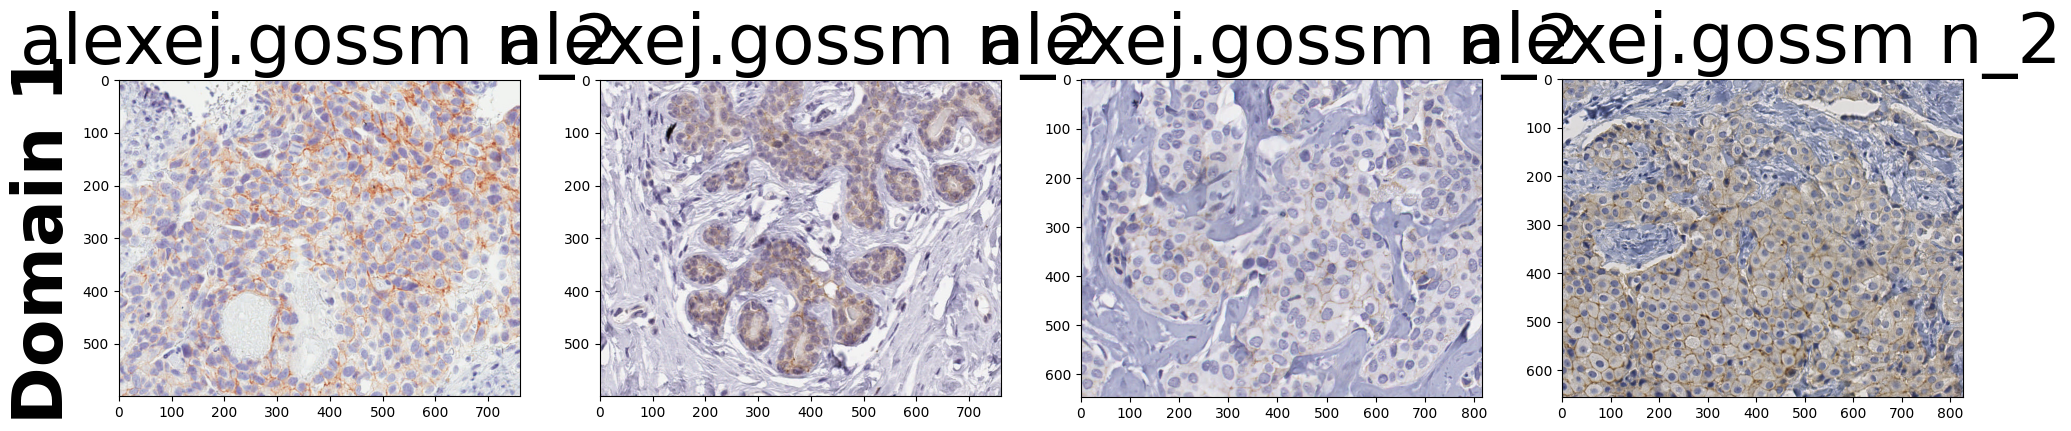

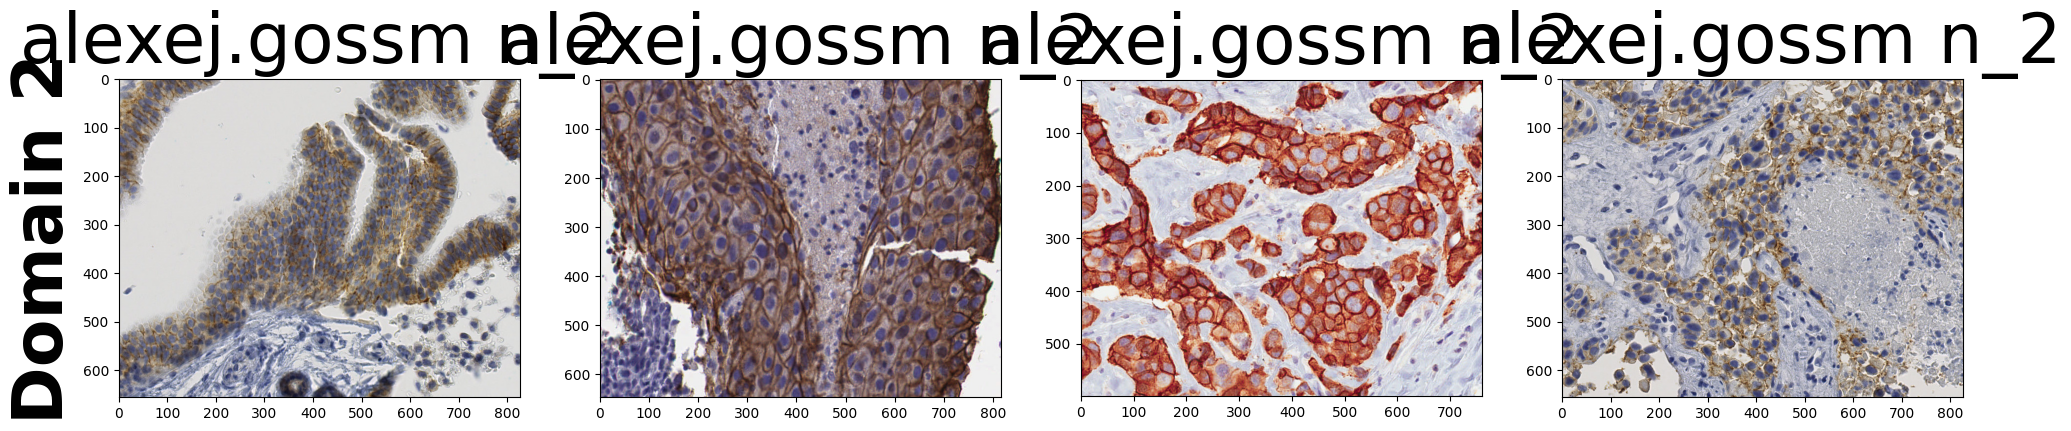

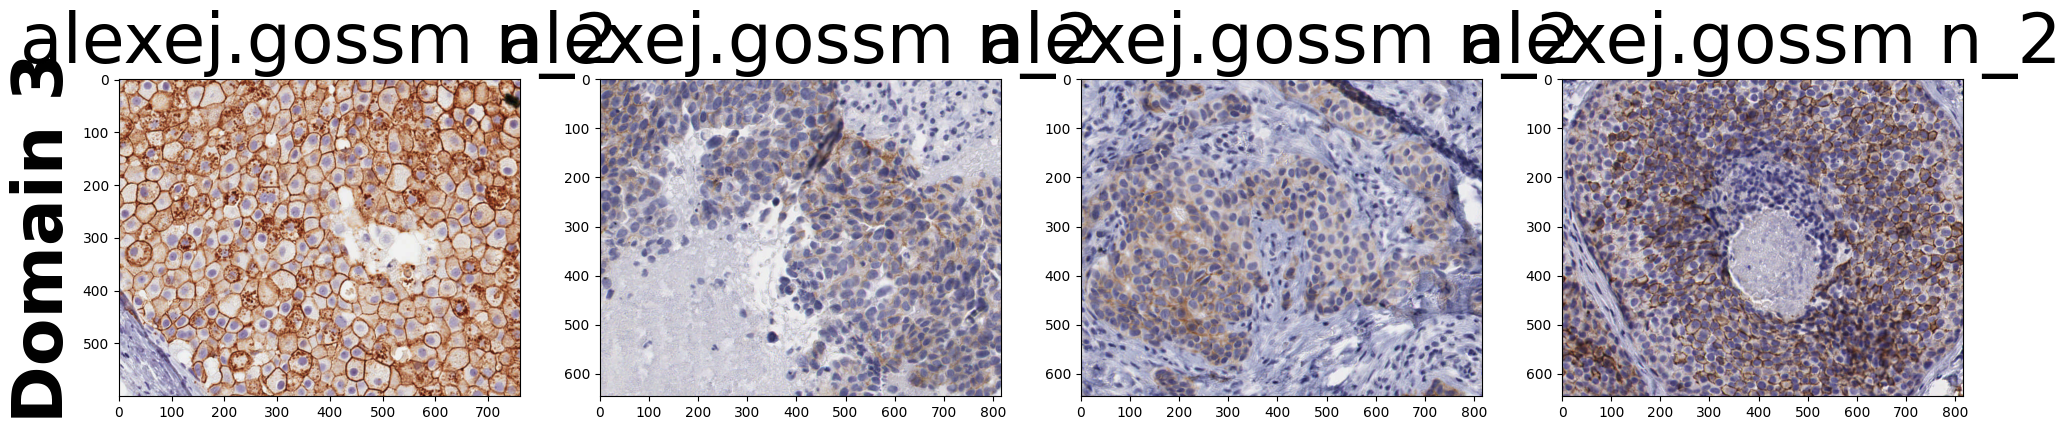

In [13]:
vizualize_images_per_domain(d1, 1, 5)
vizualize_images_per_domain(d2, 2, 5)
vizualize_images_per_domain(d3, 3, 5)
# vizualize_images_per_domain(d4, 4, 5)

# Scores Analysis 

In [14]:
def mean_scores_per_experiment(scores, img_locs):
    """
    Parser to get mean scores per image from the cvs file.
    The name of the images in the folders are slightly different from the names in the csv file.

    """

    M = []

    for prediction in img_locs:
        try:
            prediction = str(
                prediction.split("/")[-1]
            )  # depending if the path is full or not, take the img name only
        except:
            "not full path"

        if "s" in prediction:

            N = len(prediction) - 4 - 5
            # print(N, prediction[:N])
            # print(scores.loc[scores['file name'].str.contains(prediction[:N])])
            mean_score = scores.loc[
                scores["file name"].str.contains(prediction[:N])
            ].mean(axis=1)
        if "S" in prediction:

            N = len(prediction) - 4 - 5
            # print(N, prediction[:N])
            # print(scores.loc[scores['file name'].str.contains(prediction[:N])])
            mean_score = scores.loc[
                scores["file name"].str.contains(prediction[:N])
            ].mean(axis=1)
        else:
            N = len(prediction) - 6
            # print('secod case', N, prediction[:N])
            # print(scores.loc[scores['file name'].str.contains(prediction[:N])])
            mean_score = scores.loc[
                scores["file name"].str.contains(prediction[:N])
            ].mean(axis=1)
            # print(mean_score)
        mean_score = float(mean_score)
        # print(mean_score)
        M.append(mean_score)
    return M

In [15]:
def box_plot_per_domain(domain, M, fs, c, title, up, true_ex=False):
    """
    Box plot for median scores
    domain - predicted domain
    M - corresponding mean scores
    c - color fill for the box plot
    title - title of the experiment
    up - vertical displacement of the text
    true_ex  - if ground truth values (not domain, but true labels are inputted)

    """
    data1 = []
    data2 = []
    data3 = []
    # data4 = []

    for i in range(len(domain)):
        if domain[i] == 1:
            data1.append(M[i])
        if domain[i] == 2:
            data2.append(M[i])
        if domain[i] == 3:
            data3.append(M[i])
    #         if domain[i] ==4:
    #             data4.append(M[i])

    data = [data1, data2, data3]
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.boxplot(data, patch_artist=True, boxprops=dict(facecolor=c, color=c))

    ax.text(
        0.85,
        np.mean(data[0]) + up,
        str(np.mean(data[0]))[:5],
        color="black",
        fontsize=fs,
    )
    ax.text(
        1.85,
        np.mean(data[1]) + up,
        str(np.mean(data[1]))[:5],
        color="black",
        fontsize=fs,
    )
    ax.text(
        2.85,
        np.mean(data[2]) + up,
        str(np.mean(data[2]))[:5],
        color="black",
        fontsize=fs,
    )

    plt.xlabel("Domain", fontsize=fs)
    plt.ylabel("HER2/new Scores", fontsize=fs)
    plt.title("Conditional VaDE: " + title, fontsize=fs)
    plt.xticks(fontsize=fs, weight="bold")
    plt.yticks(fontsize=fs - 5)
    if true_ex == True:
        plt.xticks([1, 2, 3], ["FD", "H", "ND"], fontsize=fs)
        plt.title("Original Dataset:" + title, fontsize=fs)
    plt.show()

In [16]:
import pandas as pd

base_path = "../HER2/"
# base_path = "/your/data/location"
scores = pd.read_csv(
    os.path.join(base_path, "truthfile_002.csv"),
    names=["num", "file name", "s1", "s2", "s3", "s4", "s5", "s6", "s_7"],
)

In [17]:
ex1 = "2022-11-01 14:11:16.259751/"  # 3 clusters - 1 fold
ex2 = "2022-11-02 17:30:13.132561/"  # 3 clusters 2 fold

ex1 = "2022-12-06 15:31:29.258003/"
ex2 = "2022-12-06 22:08:14.170419/"

In [18]:
_, _, _, _, domain1, *_, img_locs1 = load_files(ex1)

In [19]:
_, _, _, _, domain2, *_, img_locs2 = load_files(ex2)

/tmp/ipykernel_2979877/2250746413.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[
/tmp/ipykernel_2979877/2250746413.py:38: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[
/tmp/ipykernel_2979877/2250746413.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[


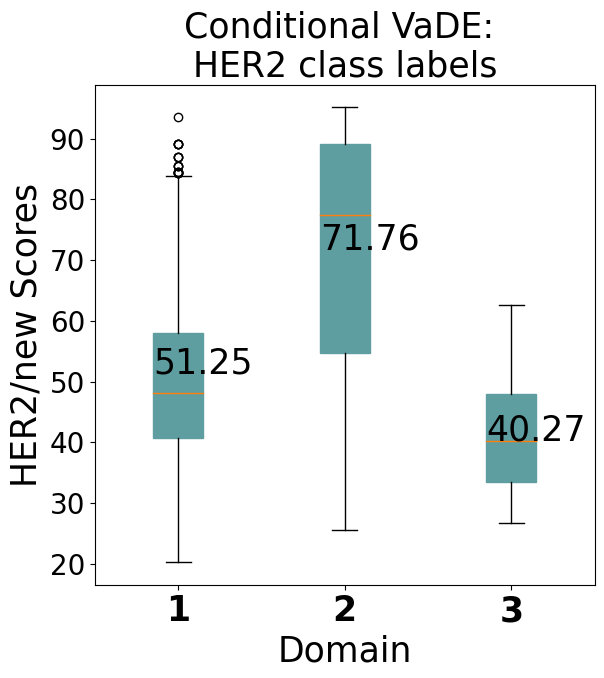

/tmp/ipykernel_2979877/2250746413.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[
/tmp/ipykernel_2979877/2250746413.py:38: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[
/tmp/ipykernel_2979877/2250746413.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[


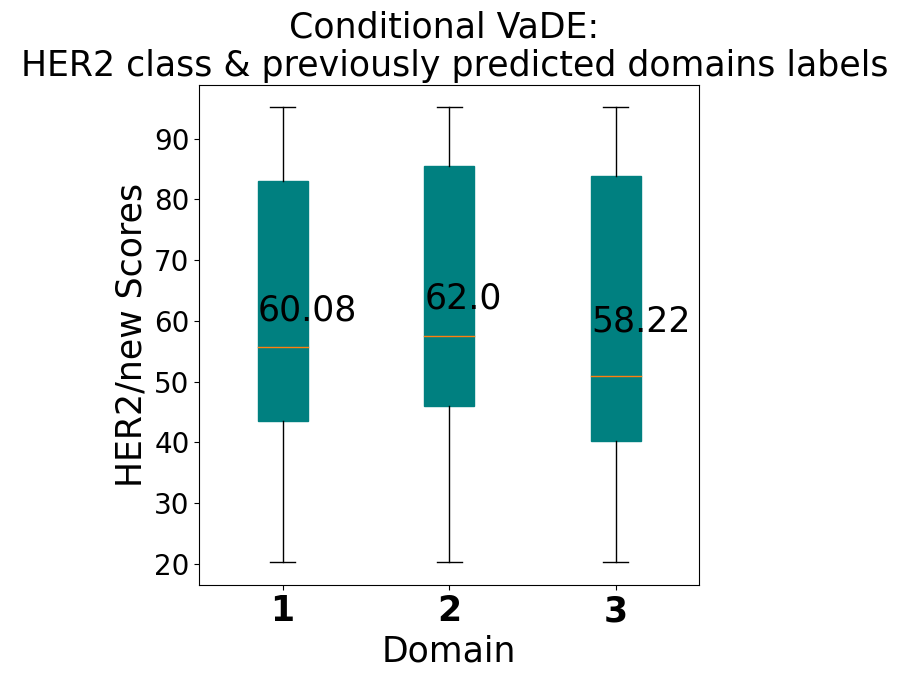

In [20]:
M1 = mean_scores_per_experiment(scores, img_locs1)
box_plot_per_domain(domain1, M1, 25, "cadetblue", "\nHER2 class labels", False)

M2 = mean_scores_per_experiment(scores, img_locs2)
box_plot_per_domain(
    domain1,
    M2,
    25,
    "teal",
    "\n HER2 class & previously predicted domains labels",
    False,
)

/tmp/ipykernel_2979877/2250746413.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[
/tmp/ipykernel_2979877/2250746413.py:38: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[
/tmp/ipykernel_2979877/2250746413.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_score = scores.loc[


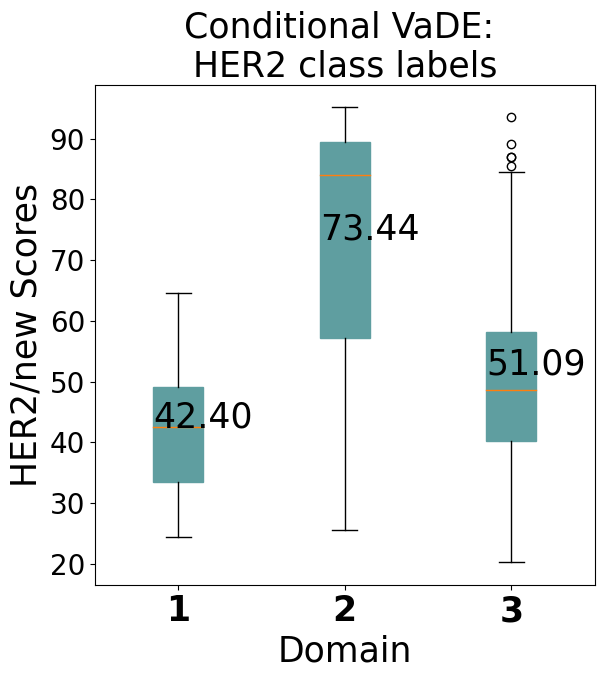

In [21]:
_, _, _, _, domain, *_, img_locs = load_files(ex)
M = mean_scores_per_experiment(scores, img_locs)
box_plot_per_domain(domain, M, 25, "cadetblue", "\nHER2 class labels", False)